In [1]:
%matplotlib inline

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_breast_cancer 

warnings.filterwarnings('ignore')

In [2]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

lets convert it in dataframe

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
df = pd.DataFrame(np.c_[data.data,data.target],columns = list(data.feature_names) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

no missing values ,no catagorical features

In [6]:
s = df.target.value_counts()
s.index = ['benign','malignant']
s

benign       357
malignant    212
Name: target, dtype: int64

In [7]:
#df['target'] = df['target'].astype('O')
d = {1:'benign',0:'malignant'}
df_new = df.copy()
df_new['target'] = df_new['target'].map(d)


In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


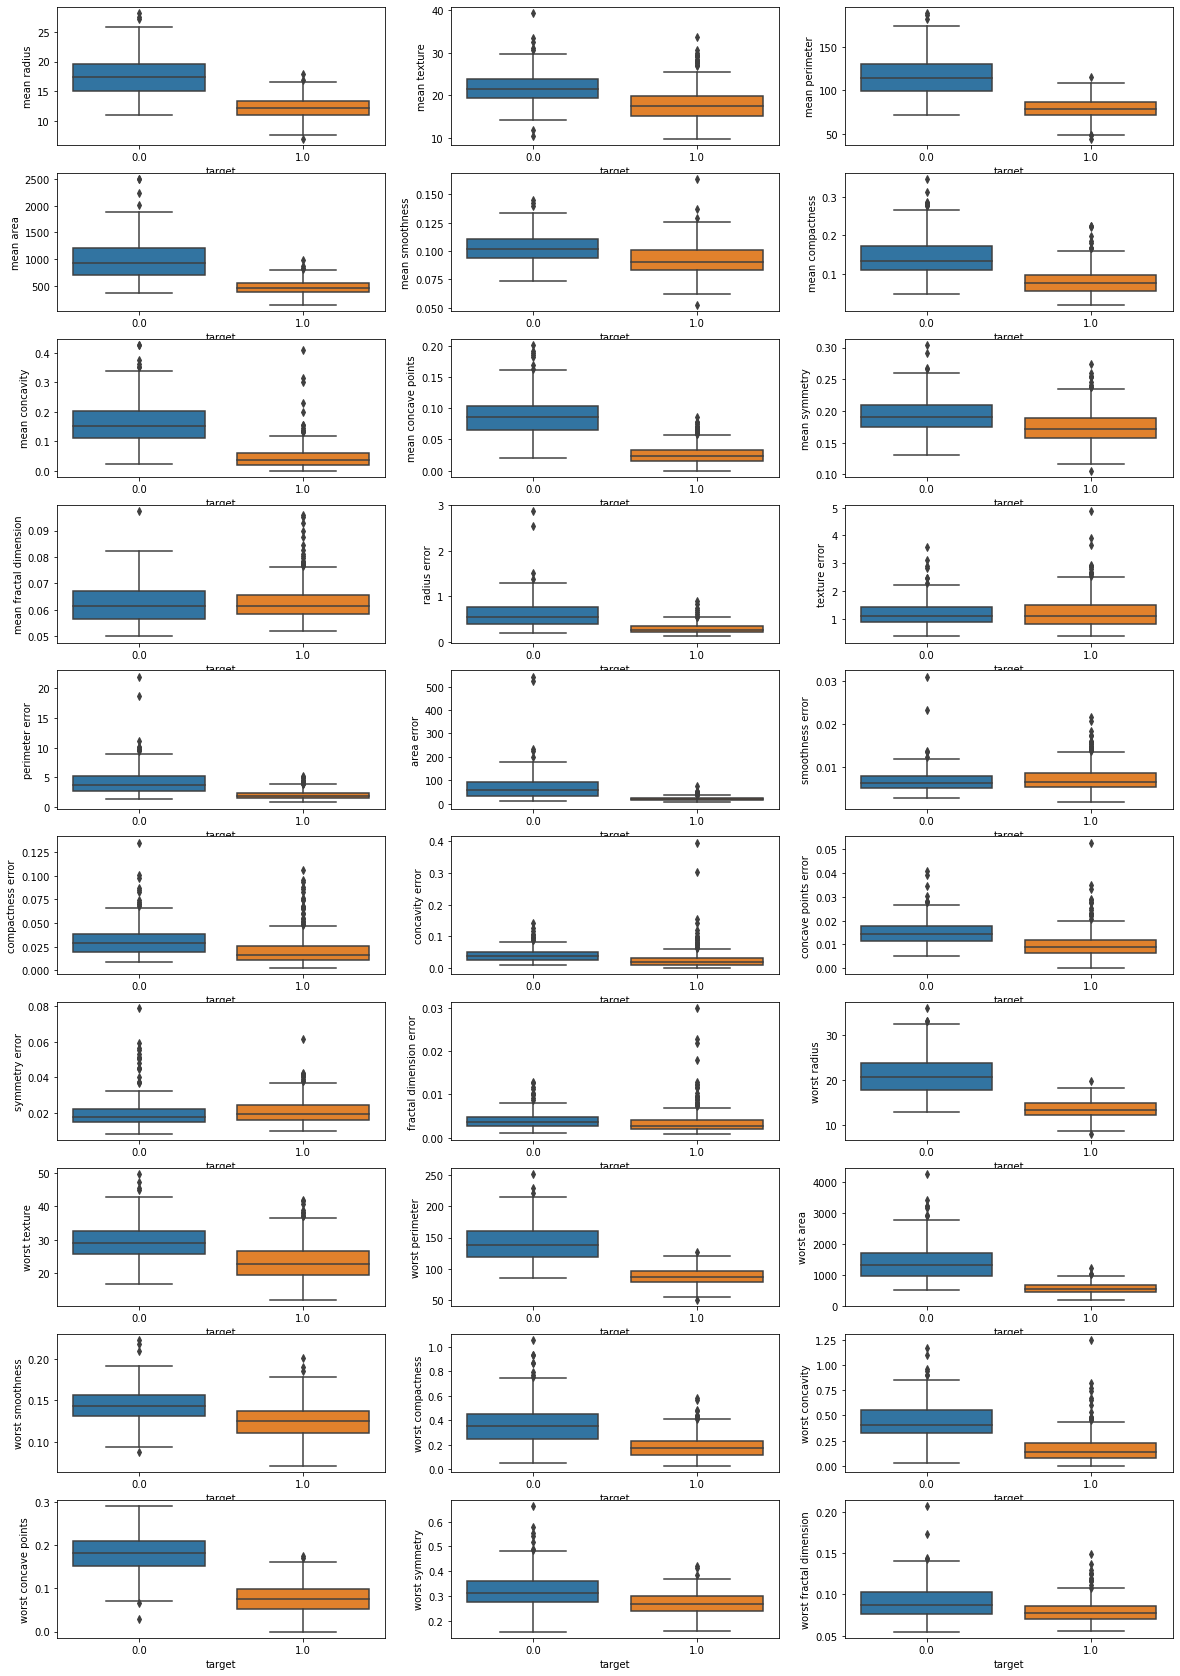

In [9]:
fig = plt.figure(figsize=(20,30))
col = df.select_dtypes(include='float64').columns[:-1]
j=0
for i in range(len(col)):
    fig.add_subplot(10,3,i+1)
    sns.boxplot(x='target',y=col[i],data=df)
plt.show()


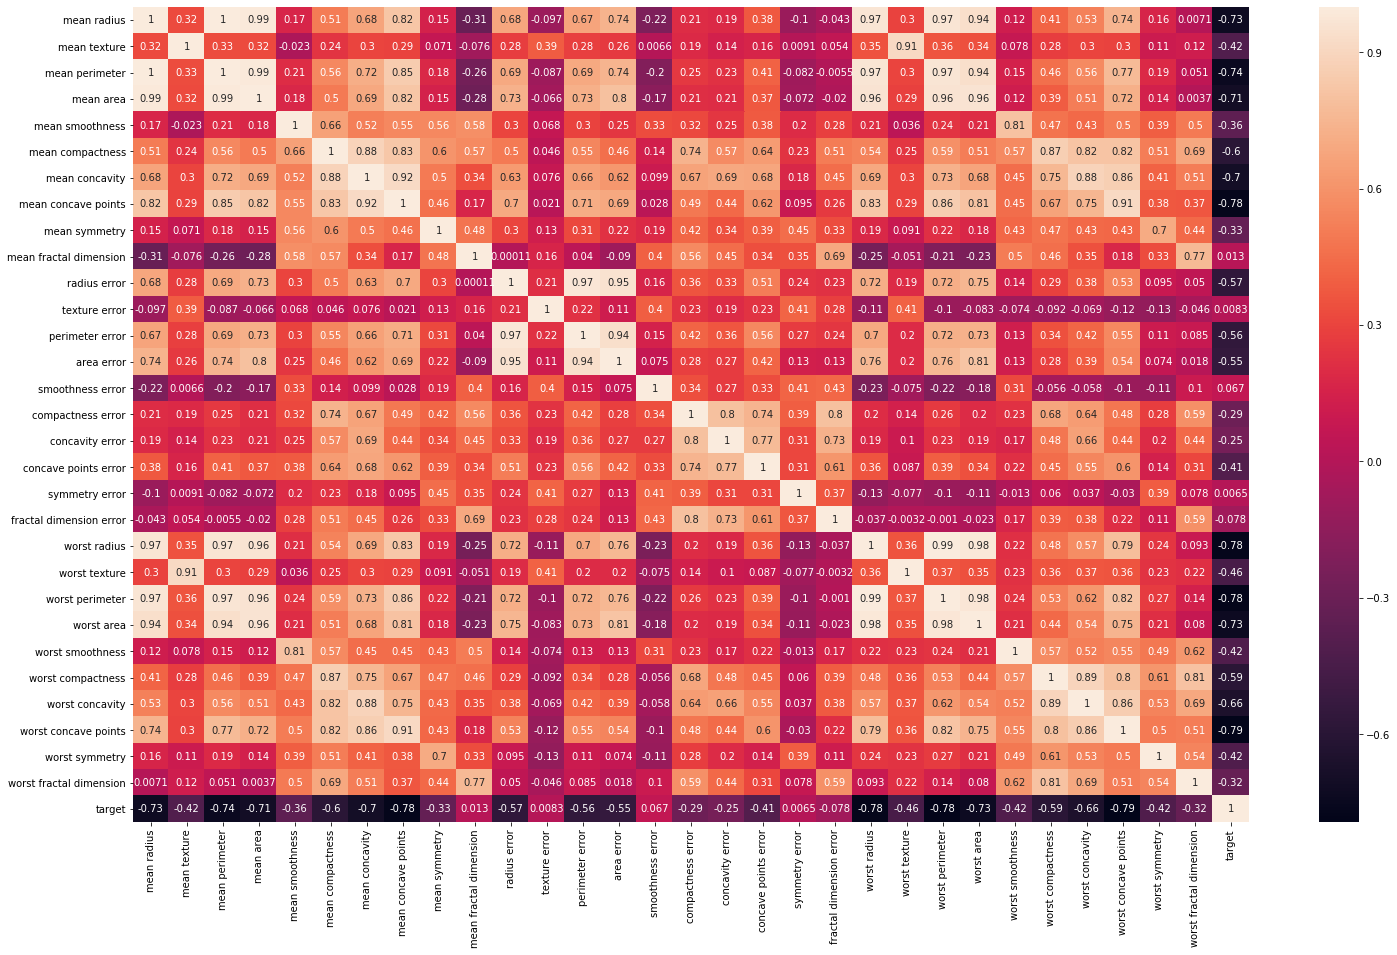

In [10]:
plt.figure(figsize=(25,15))
corr = df.corr()

sns.heatmap(corr,annot=True)

### Feature Selection

In [11]:
col = corr.columns
c = []


for col in corr.columns:
    
    strongly_corr = corr[col]
    
    strongly_corr = strongly_corr[(strongly_corr>0.8) & (strongly_corr<1.0)]

    for i , j in zip(list(strongly_corr),list(strongly_corr.index)):
        c.append([col,j])

c

[['mean radius', 'mean perimeter'],
 ['mean radius', 'mean area'],
 ['mean radius', 'mean concave points'],
 ['mean radius', 'worst radius'],
 ['mean radius', 'worst perimeter'],
 ['mean radius', 'worst area'],
 ['mean texture', 'worst texture'],
 ['mean perimeter', 'mean radius'],
 ['mean perimeter', 'mean area'],
 ['mean perimeter', 'mean concave points'],
 ['mean perimeter', 'worst radius'],
 ['mean perimeter', 'worst perimeter'],
 ['mean perimeter', 'worst area'],
 ['mean area', 'mean radius'],
 ['mean area', 'mean perimeter'],
 ['mean area', 'mean concave points'],
 ['mean area', 'area error'],
 ['mean area', 'worst radius'],
 ['mean area', 'worst perimeter'],
 ['mean area', 'worst area'],
 ['mean smoothness', 'worst smoothness'],
 ['mean compactness', 'mean concavity'],
 ['mean compactness', 'mean concave points'],
 ['mean compactness', 'worst compactness'],
 ['mean compactness', 'worst concavity'],
 ['mean compactness', 'worst concave points'],
 ['mean concavity', 'mean compactn

 since many of them highly correlated we will drop some to prevent redundancy

In [12]:
drop_list = ['mean perimeter','mean area','worst radius','worst perimeter','worst area',
             'worst texture','perimeter error','area error','mean concavity','worst concave points','worst compactness','worst smoothness','compactness error']
len(drop_list)

13

In [13]:
data = df.drop(drop_list,axis=1)
data.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,concavity error,concave points error,symmetry error,fractal dimension error,worst concavity,worst symmetry,worst fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.01587,0.03003,0.006193,0.7119,0.4601,0.11890,0.0
1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01340,0.01389,0.003532,0.2416,0.2750,0.08902,0.0
2,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02058,0.02250,0.004571,0.4504,0.3613,0.08758,0.0
3,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.01867,0.05963,0.009208,0.6869,0.6638,0.17300,0.0
4,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01885,0.01756,0.005115,0.4000,0.2364,0.07678,0.0


In [15]:
data.shape

(569, 18)

In [17]:

x = data.drop('target',axis=1)

d = {1:'benign',0:'malignant'}
y = data['target'].map(d)


In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_train.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,concavity error,concave points error,symmetry error,fractal dimension error,worst concavity,worst symmetry,worst fractal dimension
149,13.74,17.91,0.07944,0.06376,0.01329,0.1473,0.05580,0.2500,0.7574,0.002838,0.01780,0.005828,0.01329,0.001976,0.1564,0.2350,0.07014
124,13.37,16.39,0.07115,0.07325,0.02800,0.1422,0.05823,0.1639,1.1400,0.005919,0.04957,0.010380,0.01208,0.004076,0.3308,0.2048,0.07628
421,14.69,13.98,0.10310,0.18360,0.06300,0.2086,0.07406,0.5462,1.5110,0.009976,0.05278,0.015800,0.02653,0.005444,0.3219,0.2827,0.09208
195,12.91,16.33,0.07941,0.05366,0.02377,0.1829,0.05667,0.1942,0.9086,0.005298,0.02321,0.008420,0.01853,0.002152,0.1764,0.3024,0.06949
545,13.62,23.23,0.09246,0.06747,0.02443,0.1664,0.05801,0.3460,1.3360,0.005868,0.02021,0.009064,0.02087,0.002583,0.1049,0.2642,0.06953


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

model.fit(x_train,y_train)

predict = model.predict(x_test)

print('Accuracy :',accuracy_score(y_test,predict))
print('Accuracy after 10 fold cross validation',cross_val_score(model,x,y,cv=10,scoring='accuracy').mean())

Accuracy : 0.9415204678362573
Accuracy after 10 fold cross validation 0.9386785930343098


### Feature importance

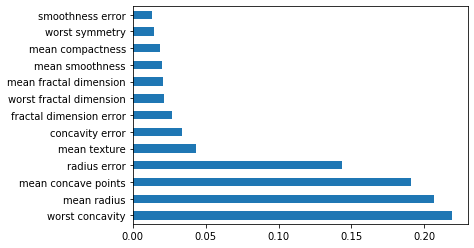

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(13).plot(kind='barh')

clearly we see 5 important features

this is how we can reduce our feature from 30 to 5 by feature selection